# Evaluation Project - 6 : Loan Application Status Prediction

**Problem Statement:**

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

**Independent Variables:**

* Loan_ID

* Gender

* Married

* Dependents

* Education

* Self_Employed

* ApplicantIncome

* CoapplicantIncome

* Loan_Amount

* Loan_Amount_Term

* Credit History

* Property_Area

**Dependent Variable (Target Variable):**

* Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

## Importing the DATASET

In [2]:
loan=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

## Checking Top 5 rows Data

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

### Checking Total Numbers of Rows and Column

In [4]:
loan.shape

(614, 13)

## Checking All Column Names

In [5]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Checking Data Type of All Data

In [6]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Checking for Null Values

In [8]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Null values are present in our dataset**

### Checking for Null Values through heatmap also

<AxesSubplot:>

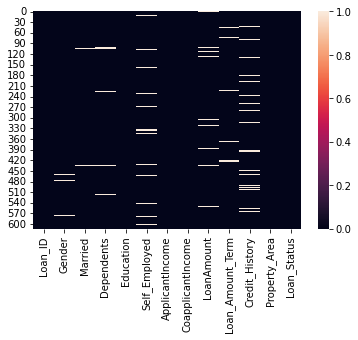

In [9]:
sns.heatmap(loan.isnull())

Here, we can see there is Null Values present in 7 columns: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

### Information about Data (Memory Used and Data Types)

In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Checking for blank value in our Target Column

In [11]:
loan[loan['Loan_Status'] == ''].index

Int64Index([], dtype='int64')

So, we can check there are no blank value present in our Target Column

In [12]:
# Checking whether the dataset contains any space
loan.loc[loan['Loan_Status']==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


So we can see there are no spaces present in the dataset.

### Checking unique values present in the Target Variable.

In [13]:
loan['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [14]:
loan['Loan_Status'].nunique()

2

### Total Values in the target variable

In [15]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Data Cleaning and preprocessing

Since there are Null values in the dataset, so we need to treat them.

#### Handling Null Values

In [16]:
#checking all values of column 'Gender'
loan["Gender"].unique() 

array(['Male', 'Female', nan], dtype=object)

In [17]:
#checking repeated values in "Gender" column through mode
print( loan["Gender"].mode())

0    Male
dtype: object


In [18]:
#Filling Null Values of "other_fuel1" column in dataset by mode value
loan["Gender"].fillna(loan["Gender"].mode()[0], inplace=True)

In [19]:
#checking all values of column 'Married'
loan["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
#checking repeated values in "Married" column through mode
print( loan["Married"].mode())

0    Yes
dtype: object


In [21]:
#Filling Null Values of "Married" column in dataset by mode value
loan["Married"].fillna(loan["Married"].mode()[0], inplace=True)

In [22]:
#checking all values of column 'Dependents'
loan["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [23]:
#checking repeated values in "Dependents" column through mode
print( loan["Dependents"].mode())

0    0
dtype: object


In [24]:
#Filling Null Values of "Dependents" column in dataset by mode value
loan["Dependents"].fillna(loan["Dependents"].mode()[0], inplace=True)

In [25]:
#checking all values of column 'Self_Employed'
loan["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [26]:
#checking repeated values in "Self_Employed" column through mode
print( loan["Self_Employed"].mode())

0    No
dtype: object


In [27]:
#Filling Null Values of "Self_Employed" column in dataset by mode value
loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0], inplace=True)

In [28]:
#checking all values of column 'LoanAmount'
loan["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [29]:
#Filling Null Values of "LoanAmount" column in dataset by mean value
loan["LoanAmount"].fillna(loan["LoanAmount"].mean(), inplace=True)

In [30]:
#checking all values of column 'Loan_Amount_Term'
loan["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [31]:
#Filling Null Values of "Loan_Amount_Term" column in dataset by mean value
loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mean(), inplace=True)

In [32]:
#checking all values of column 'Credit_History'
loan["Credit_History"].unique()

array([ 1.,  0., nan])

In [33]:
#Filling Null Values of "Credit_History" column in dataset by mean value
loan["Credit_History"].fillna(loan["Credit_History"].mean(), inplace=True)

### Droping irrelevant column

In [34]:
# The column Loan_ID is the unique ID given to the applicants and it has no relation with our target column. So, we wil drop this column.
loan=loan.drop(columns="Loan_ID", axis=1)

## Again Checking for Null Values after Handling it

In [35]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**So, now our dataset have no null value after handling null values.**

In [36]:
#total Columns after handling null values
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
#total Rows and Columns after handling null values
loan.shape

(614, 12)

## Descriptive Statistics

In [39]:
# Description of Dataset : works only on continuous column 
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


* We can check that 5 columns contains Continuous data: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History.
* And 7 columns contains Categorical data: 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status'.
* Here also we can see that there is no null value in aur dataset as count is 614 in each column.

### Checking Description through heatmap also.

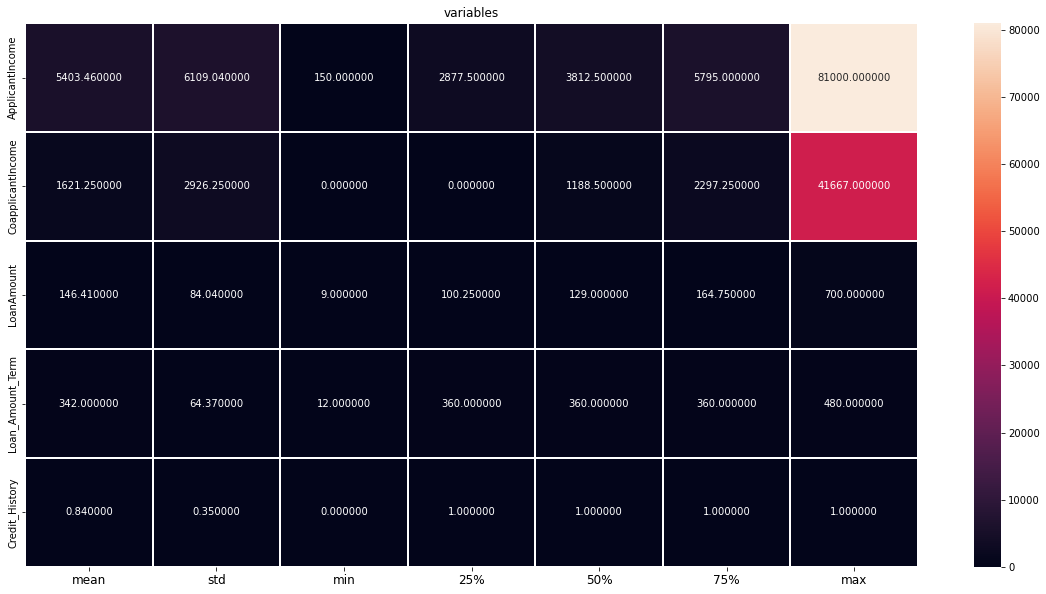

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(round(loan.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

**Outcome of Describe of Datasets:**
* Value of Std is higher than mean which shows skewness is present in columns ('ApplicantIncome','CoapplicantIncome'), we will check for skewness later.
* Difference between 25%,50% and 75% in columns ('Loan_Amount_Term', 'Credit_History') is 0.

# Data Visualization

## Univariate Analysis
## Using Countplot for categorical columns

Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

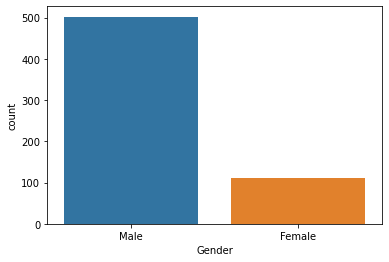

In [41]:
#Count Plot for "Gender" column
print(loan["Gender"].value_counts())

sns.countplot("Gender",data=loan)

We can see Male applicant is more (total no- 502) compare to Female applicant (total no- 112).

Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

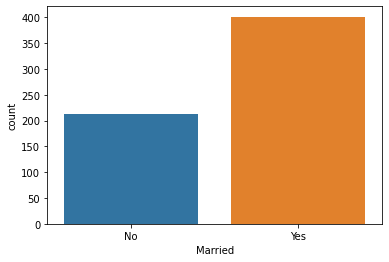

In [42]:
#Count Plot for "Married" column
print(loan["Married"].value_counts())

sns.countplot("Married",data=loan)

We can see Married Applicant (total no- 401) are more compare to Unmarried Applicant (total no- 213) .

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

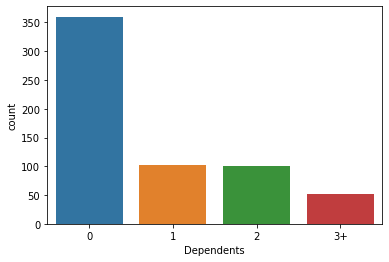

In [43]:
#Count Plot for "Dependents" column
print(loan["Dependents"].value_counts())

sns.countplot("Dependents",data=loan)

We can see dependents 0 is more (total no- 502) than dependents 1 (total no- 102), dependents 1 is more (total no- 102) than dependents 2 (total no- 101) and dependents 2 is more (total no- 101) than dependents 3+ (total no- 51) of applicants.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

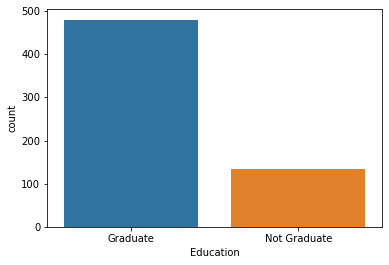

In [44]:
#Count Plot for "Education" column
print(loan["Education"].value_counts())

sns.countplot("Education",data=loan)

We can see Graduate Applicant (total no- 480) are more compare to Not Graduate Applicant (total no- 134) .

No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

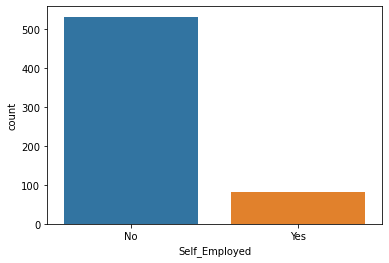

In [45]:
#Count Plot for "Self_Employed" column
print(loan["Self_Employed"].value_counts())

sns.countplot("Self_Employed",data=loan)

We can see Not Self Employed Applicant (total no- 532) are more compare to Self Employed Applicant (total no- 82) .

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

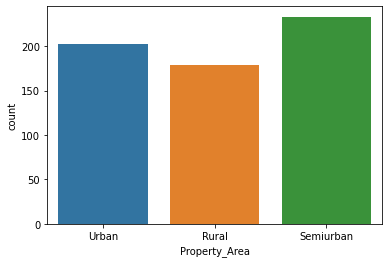

In [46]:
#Count Plot for "Property_Area" column
print(loan["Property_Area"].value_counts())

sns.countplot("Property_Area",data=loan)

We can see Semiurban Property Area of Applicant (total no- 233) are more compare to Urban Property Area of Applicant (total no- 202) and Urban Property Area of Applicant (total no- 202) are more compare to Rural Property Area of Applicant (total no- 179).

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

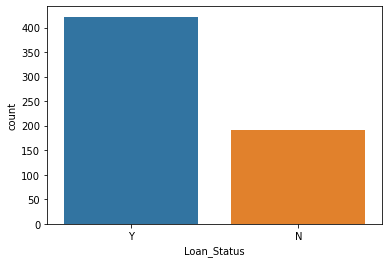

In [47]:
#Count Plot for "Loan_Status" column
print(loan["Loan_Status"].value_counts())

sns.countplot("Loan_Status",data=loan)

Approved Loan status of applicant (total no- 422) are more compare to not approved (total no- 192).

### Using Histplot for continuous columns

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

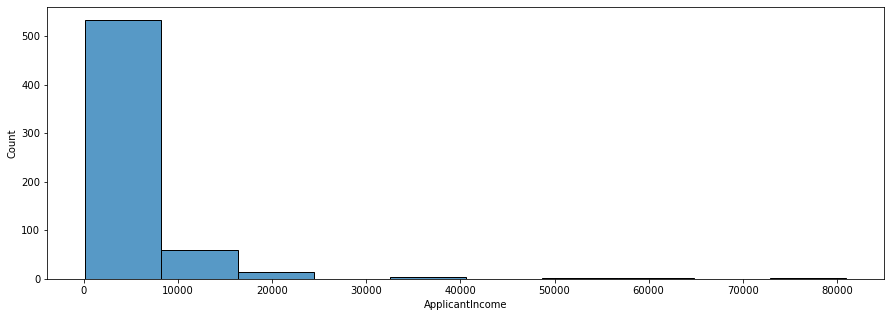

In [48]:
#Histplot for "ApplicantIncome" column
plt.figure(figsize=(15,5))
sns.histplot(x='ApplicantIncome',data=loan,bins=10)

We can see Applicant Income between 0 to 9000 is of more than 500 applicant and between 75000 to 82000 is of 0/1 applicant.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

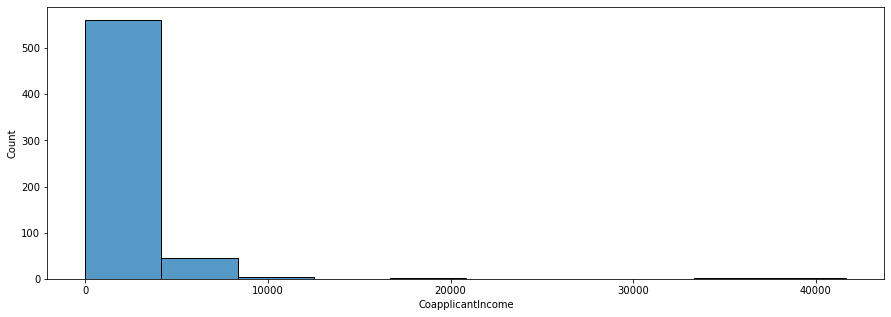

In [49]:
#Histplot for "CoapplicantIncome" column
plt.figure(figsize=(15,5))
sns.histplot(x='CoapplicantIncome',data=loan,bins=10)

We can see Co-applicant Income between 0 to 4000 is more than 500 applicants and between 35000 to 42000 is 0/1 applicant.

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

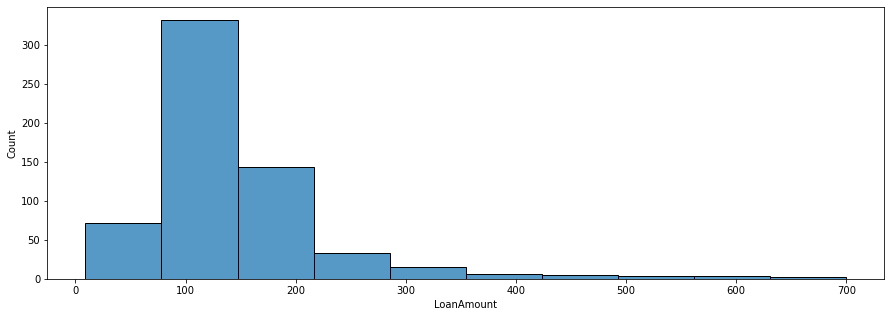

In [50]:
#Histplot for "LoanAmount" column
plt.figure(figsize=(15,5))
sns.histplot(x='LoanAmount',data=loan,bins=10)

We can see Loan Amount between 90000 to 150000 is applied by more than 300 applicant and between 625000 to 700000 is applied by approx 5 applicant.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

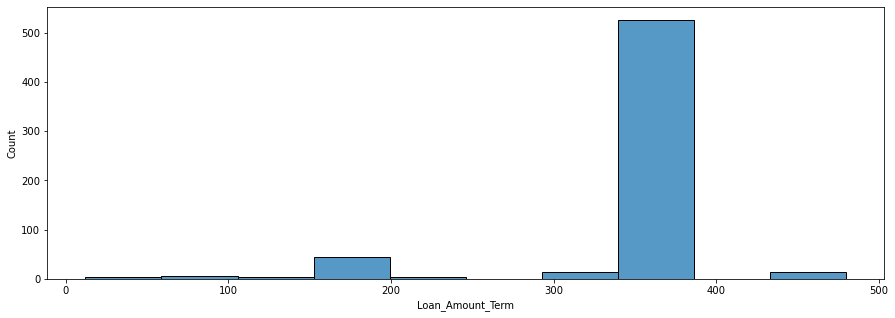

In [51]:
#Histplot for "Loan_Amount_Term" column
plt.figure(figsize=(15,5))
sns.histplot(x='Loan_Amount_Term',data=loan,bins=10)

Loan Amount Term is between 330 months to 380 months are applied by more than 500 applicant and between 10 months to 60 months & between 200 months to 250 months are applied by 5/10 applicant.

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

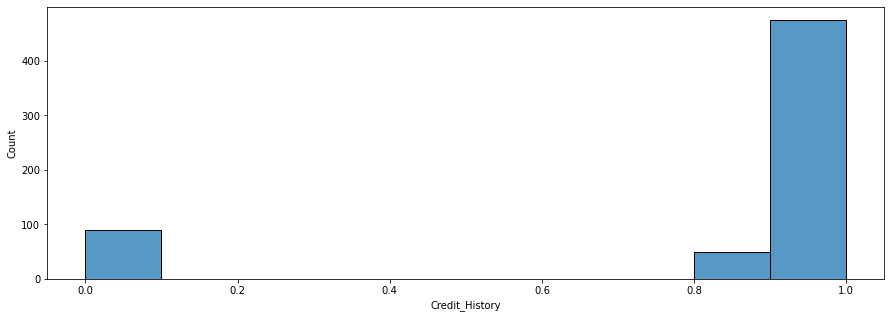

In [52]:
#Histplot for "Credit_History" column
plt.figure(figsize=(15,5))
sns.histplot(x='Credit_History',data=loan,bins=10)

We can see Credit History of Applicant between 0.9 to 1.0 is of more than 450 applicant and between 0.1 to 0.8 there are of no applicant. between 0.8 to 0.9 there are 50 applicants.

### Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

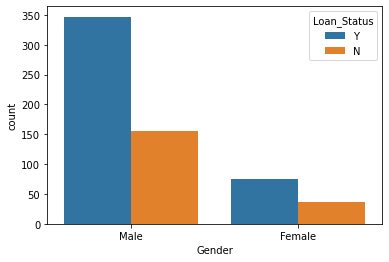

In [53]:
#Count Plot for comparision between "Gender" column and "Loan_Status" column
sns.countplot("Gender",data=loan, hue='Loan_Status')

More male applicant loan is approved compared to Female Applicant.

<AxesSubplot:xlabel='Married', ylabel='count'>

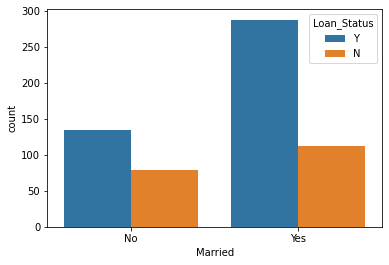

In [54]:
#Count Plot for comparision between "Married" column and "Loan_Status" column
sns.countplot("Married",data=loan, hue='Loan_Status')

More married applicant loan is approved compare to Unmarried applicant.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

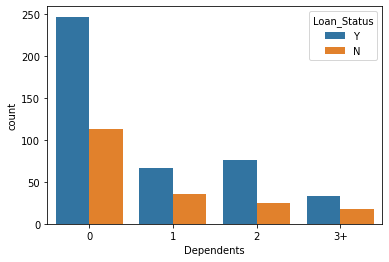

In [55]:
#Count Plot for comparision between "Dependents" column and "Loan_Status" column
sns.countplot("Dependents",data=loan, hue='Loan_Status')

Having no dependents applicant's loan is approved compare to having 1, 2 and 3+ dependents

<AxesSubplot:xlabel='Education', ylabel='count'>

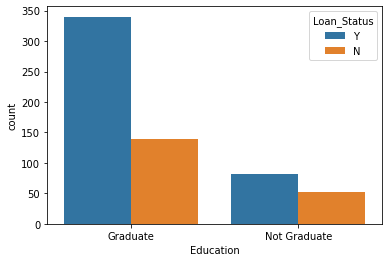

In [56]:
#Count Plot for comparision between "Education" column and "Loan_Status" column
sns.countplot("Education",data=loan, hue='Loan_Status')

Graduate applicant loan getting approved is more compare to Not graduate.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

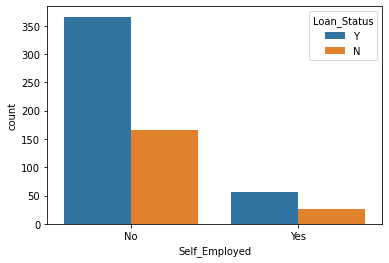

In [57]:
#Count Plot for comparision between "Self_Employed" column and "Loan_Status" column
sns.countplot("Self_Employed",data=loan, hue='Loan_Status')

Not self employed applicant's loan is approved more compare to self-employed.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

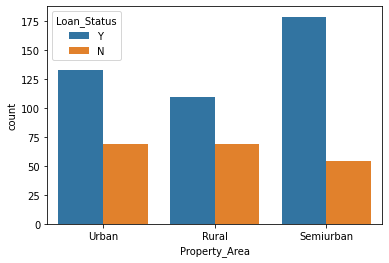

In [58]:
#Count Plot for comparision between "Property_Area" column and "Loan_Status" column
sns.countplot("Property_Area",data=loan, hue='Loan_Status')

Urban and Rural Property Area loan is approved more compare semiurban

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

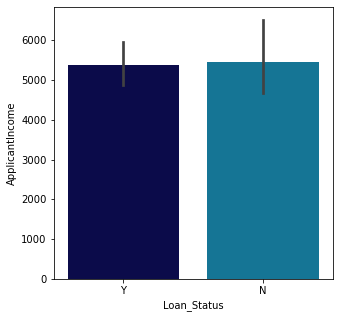

In [59]:
#Bar Plot for comparision between "ApplicantIncome" and "Loan_Status" column
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status', y='ApplicantIncome',data=loan, palette='ocean')

Applicant income 5300 loan is approved compare to Applicant income 5400

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

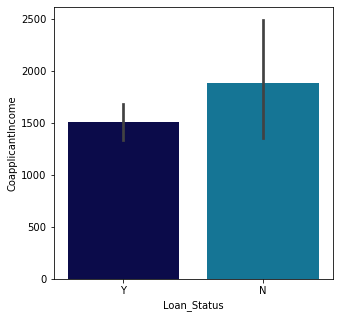

In [60]:
#Bar Plot for comparision between "CoapplicantIncome" and "Loan_Status" column
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status', y='CoapplicantIncome',data=loan, palette='ocean')

Co-applicant Income 1500 is approved.

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

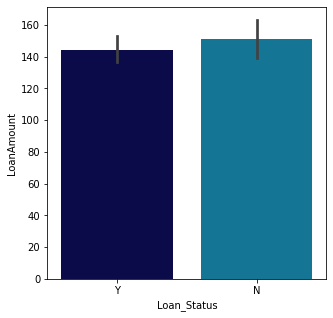

In [61]:
#Bar Plot for comparision between "LoanAmount" and "Loan_Status" column
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status', y='LoanAmount',data=loan, palette='ocean')

Loan amount applied for 145000 is approved more compare to 150000 loan amount.

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

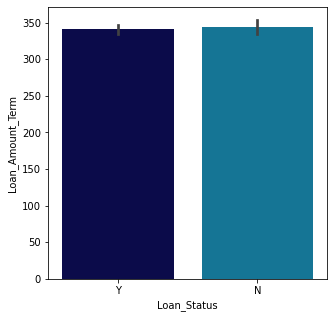

In [62]:
#Bar Plot for comparision between "Loan_Amount_Term" and "Loan_Status" column
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status', y='Loan_Amount_Term',data=loan, palette='ocean')

Loan applied for 340 months not approved compare to 338 Loan applied for 340 months not approved compare to 338 months.

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

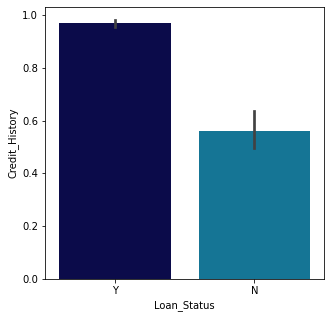

In [63]:
#Bar Plot for comparision between "Credit_History" and "Loan_Status" column
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status', y='Credit_History',data=loan, palette='ocean')

Credit history till 0.95 of applicant is approved compare to having 0.5 credit history.

# Multivariate Analysis

### Using Pairplot

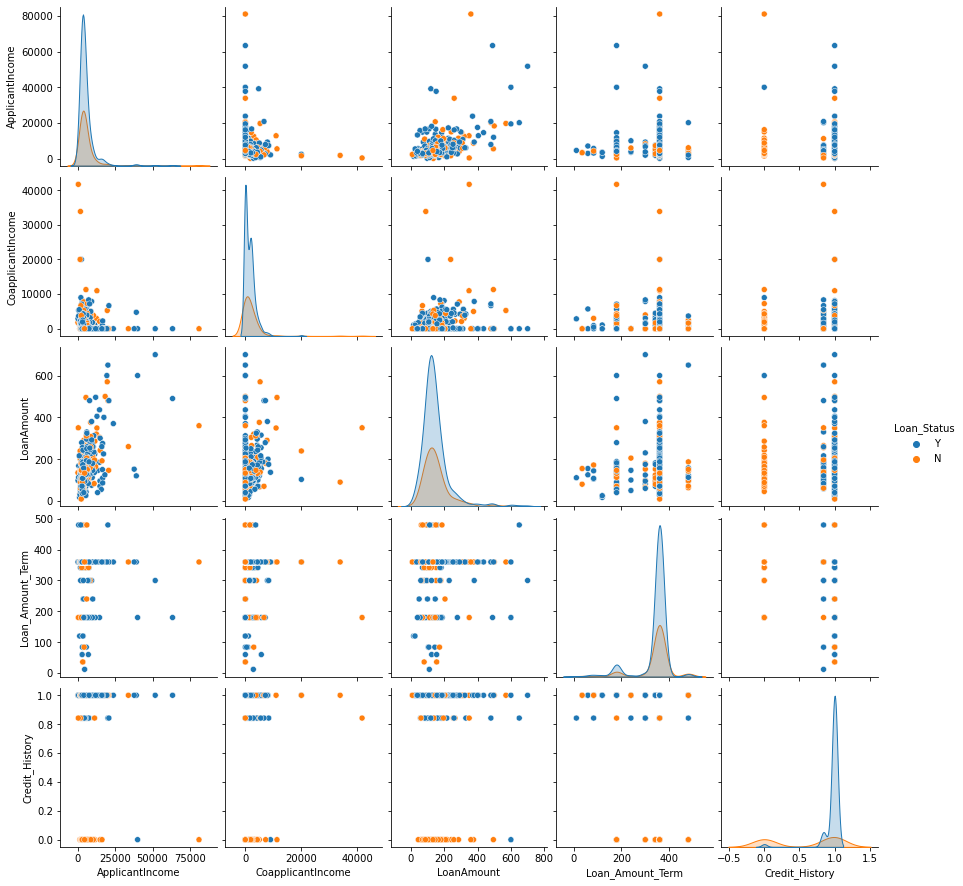

In [64]:
sns.pairplot(loan,hue="Loan_Status")

* We can observe relationship between all the featues column and the target column by this pairplot in pairs which are plotted on basis of target column.


# Label Encoding

In [65]:
encoder=LabelEncoder()

In [66]:
loan['Gender'] = encoder.fit_transform(loan['Gender'])
loan['Married'] = encoder.fit_transform(loan['Married'])
loan['Dependents'] = encoder.fit_transform(loan['Dependents'])
loan['Education'] = encoder.fit_transform(loan['Education'])
loan['Self_Employed'] = encoder.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = encoder.fit_transform(loan['Property_Area'])
loan['Loan_Status'] = encoder.fit_transform(loan['Loan_Status'])

In [67]:
#checking top 5 rows data after encoding
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## Checking Correlation

In [68]:
loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


This gives the correlation between the denpendent and independent variables.

In [69]:
loan.corr()["Loan_Status"].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

We can observe :

* columns are sorted in ascending order showing least to strong correlation with target column.
* 6 columns are negatively correlated and 5 columns are positively correlated.

### checking correlation with heatmap

<AxesSubplot:>

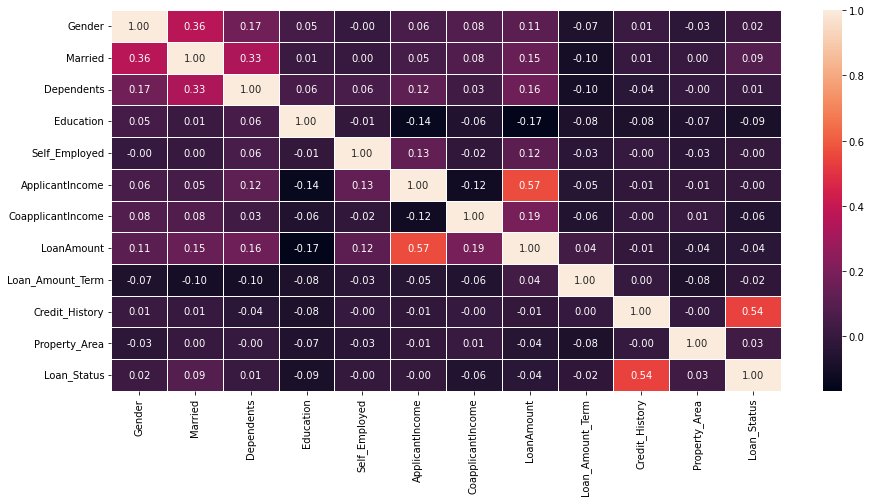

In [70]:
plt.figure(figsize=(15,7))
sns.heatmap(loan.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

### Outcome of Correlation
* Gender has 2 percent correlation with the target column which can be considered as good correlation and positively correlated.
* Married has 9 percent correlation with the target column which can be considered as good correlation and positively correlated.
* Dependents has 1 percent correlation with the target column which can be considered as good correlation and positively correlated.
* Education has -9 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* Self_Employed has -0 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* ApplicantIncome has -0 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* CoapplicantIncome has -6 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* LoanAmount has -4 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* Loan_Amount_Term has -2 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* Credit_History has 54 percent correlation with the target column which can be considered as strong correlation and positively correlated.
* Property_Area has 3 percent correlation with the target column which can be considered as good correlation and positively correlated.

* Max correlation is with Credit_History
* Min correlation is with Education

## Checking correlation with barplot

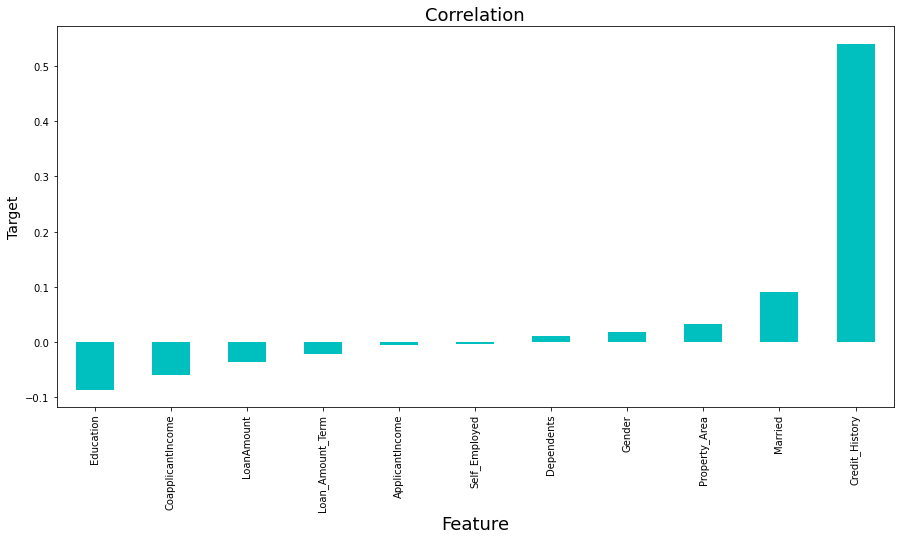

In [71]:
plt.figure(figsize=(15,7))
loan.corr()['Loan_Status'].sort_values(ascending=True).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here also we can see Credit_History is positively and strongly correlated with Target column and Self_Employed is least correlated but Education is weak and Negatively correlated with Target column.

In [72]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Checking Outliers

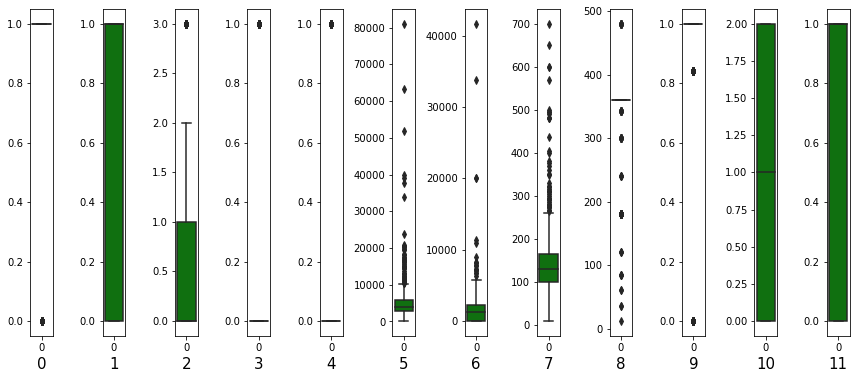

In [73]:
collist=loan.columns.values
ncol=12
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(collist)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=loan[collist[column]],color='green',orient='v')
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

## Observation:
* Outliers present in columns: 'Gender', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',

* Outliers not present in columns: 'Married', 'Property_Area', 'Loan_Status'

# Removing Outliers

# 1. Zscore method using Scipy

In [74]:
#  Outliers will be removed only from Continuous column variable i.e; 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History'. 
#We will not remove outliers from Categorical column i.e;  'Gender', 'Dependents', 'Education' and 'Self_Employed'.

variables = loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

z=np.abs(zscore(variables))

# Creating new dataframe
loan_appl = loan[(z<3).all(axis=1)]
loan_appl.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [75]:
z.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.45164
1,0.134412,0.038732,0.219273,0.279851,0.45164
2,0.393747,0.554487,0.957641,0.279851,0.45164
3,0.462062,0.251980,0.314547,0.279851,0.45164
4,0.097728,0.554487,0.064454,0.279851,0.45164


In [76]:
print("Old DataFrame data in Rows and Column:",loan.shape)
print("New DataFrame data in Rows and Column:",loan_appl.shape)
print("Total Dropped rows:",loan.shape[0]-loan_appl.shape[0])

Old DataFrame data in Rows and Column: (614, 12)
New DataFrame data in Rows and Column: (577, 12)
Total Dropped rows: 37


## Percentage Data Loss using Zscore

In [77]:
loss_percent=(614-577)/614*100
print(loss_percent,"%")

6.026058631921824 %


## 2. IQR (Inter Quantile Range) method

In [78]:
#1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

#IQR
IQR=Q3 - Q1
loan_stat=loan[~((loan < (Q1 - 1.5 * IQR)) |(loan > (Q3 + 1.5 * IQR))).any(axis=1)]

In [79]:
print("Old DataFrame data in Rows and Column:",loan.shape)
print("\nNew DataFrame data in Rows and Column:",loan_stat.shape)
print("\nTotal Dropped rows:",loan.shape[0]-loan_stat.shape[0])

Old DataFrame data in Rows and Column: (614, 12)

New DataFrame data in Rows and Column: (350, 12)

Total Dropped rows: 264


## Percentage Data Loss using IQR

In [80]:
loss_perc = (614-350)/614*100
loss_perc

42.99674267100978

We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.

## Checking for the skewness

In [81]:
loan_appl.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

## Observation:
* Skewness threshold taken is +/-1.
* Columns which are having skewness: Gender, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History.
* The Self_Employed column data is highly skewed
* All the columns are not normallly distributed, they are ske.wed
* Since Gender, Dependents, Education, Self_Employed are categorical column so we will not remove skewness from them. Only we will remove skewness from ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History as these column contains continuous data.

## Data visualization of skewed continuous column using distplot

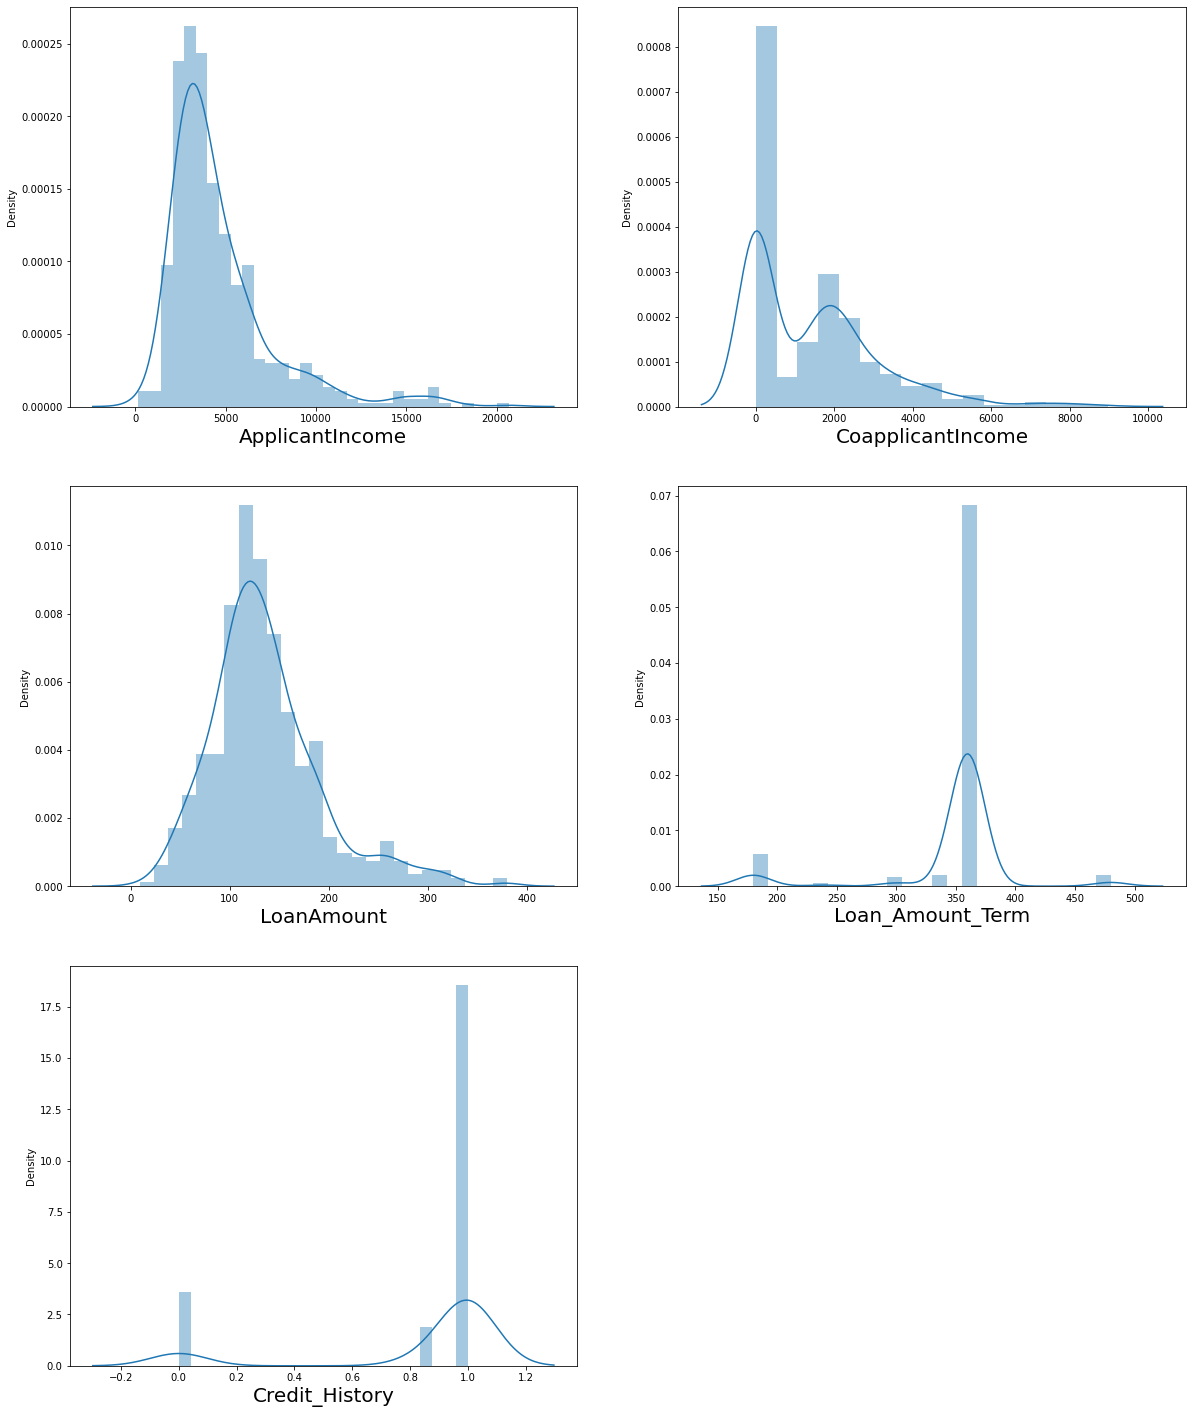

In [82]:
collist=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in loan_appl[collist]:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(loan_appl[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Removing skewness using yeo-johnson method

In [83]:
collist=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
loan_appl[collist]=power_transform(loan_appl[collist],method='yeo-johnson')
loan_appl[collist]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.681780,-1.122446,0.316078,0.142609,0.515236
1,0.234783,0.744117,-0.015871,0.142609,0.515236
2,-0.527201,-1.122446,-1.443112,0.142609,0.515236
3,-0.791972,0.895786,-0.169860,0.142609,0.515236
4,0.728848,-1.122446,0.221481,0.142609,0.515236
...,...,...,...,...,...
609,-0.587375,-1.122446,-1.301481,0.142609,0.515236
610,0.035386,-1.122446,-2.321865,-2.559206,0.515236
611,1.281658,0.173344,1.838099,0.142609,0.515236
612,1.164426,-1.122446,0.961555,0.142609,0.515236


### checking skewness after removal

In [84]:
loan_appl.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

### checking skewness after removal through data visualization using distplot

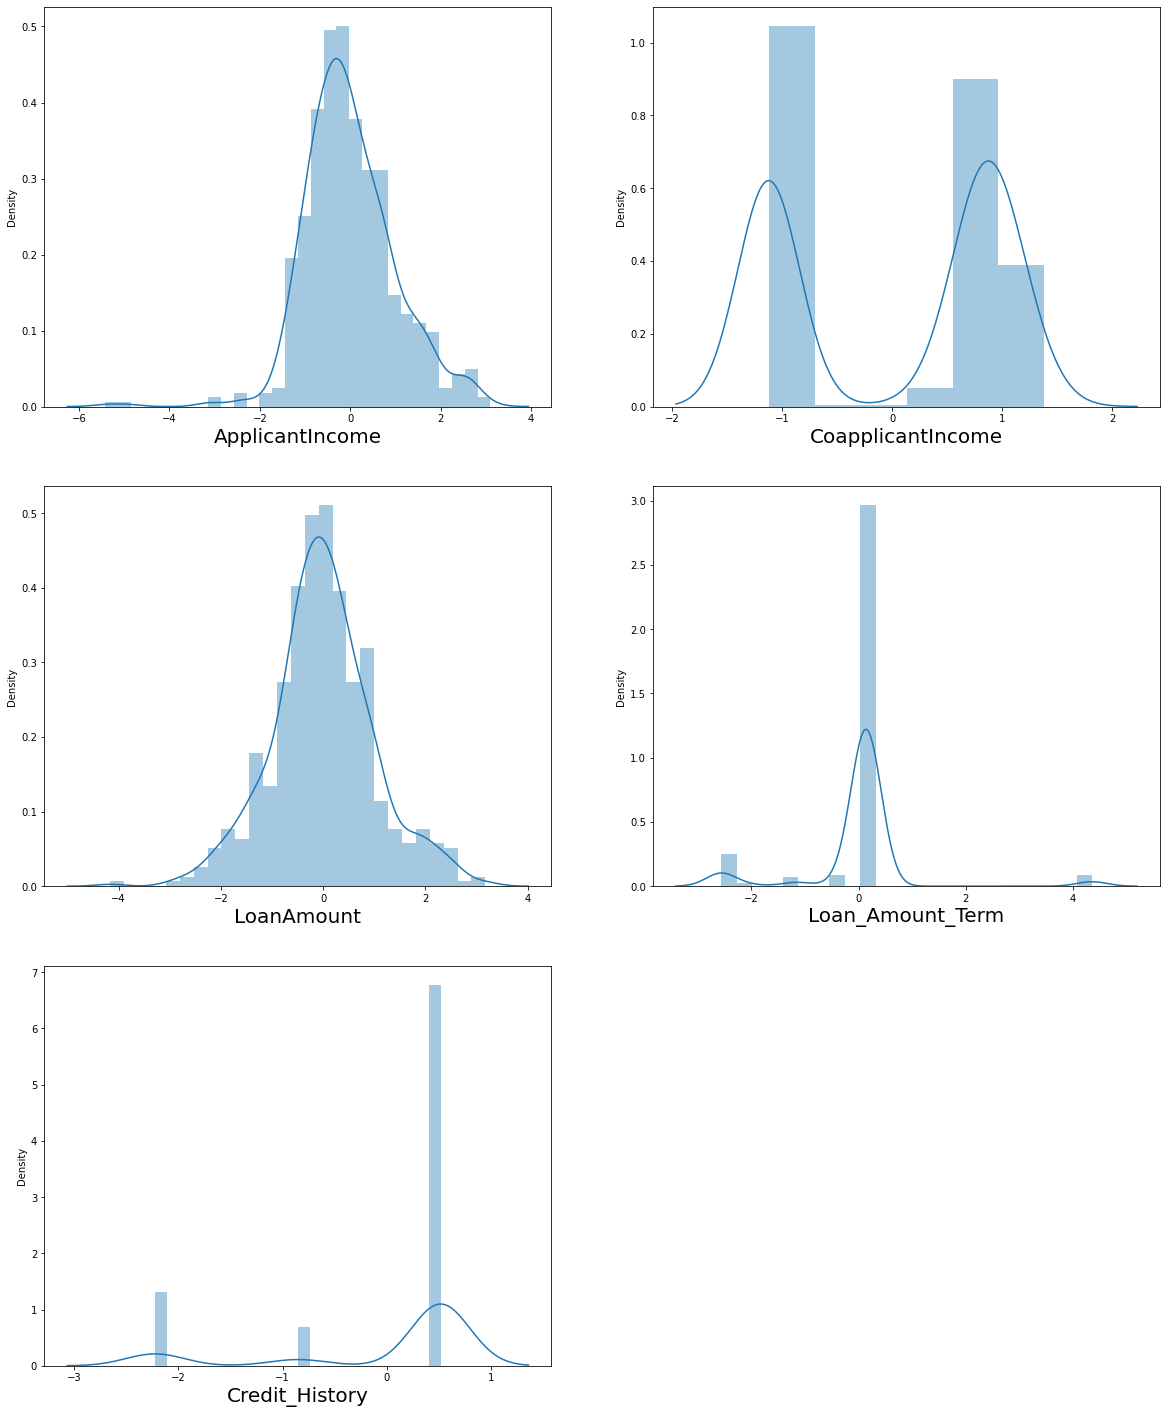

In [85]:
collist=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in loan_appl[collist]:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(loan_appl[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has got removed compared to the old data.

# Data preprocessing

## Spliting data into Target and Features:

In [86]:
x=loan_appl.drop("Loan_Status",axis=1)
y=loan_appl["Loan_Status"]

In [87]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.681780,-1.122446,0.316078,0.142609,0.515236,2
1,1,1,1,0,0,0.234783,0.744117,-0.015871,0.142609,0.515236,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.443112,0.142609,0.515236,2
3,1,1,0,1,0,-0.791972,0.895786,-0.169860,0.142609,0.515236,2
4,1,0,0,0,0,0.728848,-1.122446,0.221481,0.142609,0.515236,2


In [88]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [89]:
x.shape, y.shape

((577, 11), (577,))

In [90]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

## Oversampling using the SMOTE

In [91]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [92]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [93]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

After using oversampling method, we check that now our data is balanced.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

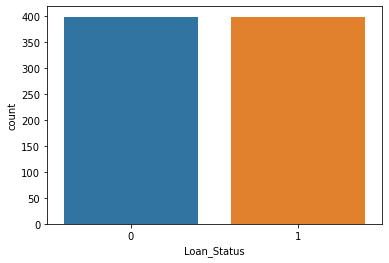

In [94]:
#checking through visualization also
sns.countplot(y)

Now, our data is balanced.

## Scaling data using Standard Scaler

In [95]:
x.shape, y.shape

((796, 11), (796,))

In [96]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [97]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.499607,-1.248794,-0.708367,-0.517219,-0.341188,0.712748,-1.091966,0.310356,0.144682,0.639052,1.289058
1,0.499607,0.800773,0.322456,-0.517219,-0.341188,0.243516,0.768874,-0.027604,0.144682,0.639052,-1.204479
2,0.499607,0.800773,-0.708367,-0.517219,2.930932,-0.556372,-1.091966,-1.480688,0.144682,0.639052,1.289058
3,0.499607,0.800773,-0.708367,1.933415,-0.341188,-0.834314,0.920078,-0.184381,0.144682,0.639052,1.289058
4,0.499607,-1.248794,-0.708367,-0.517219,-0.341188,0.762157,-1.091966,0.214046,0.144682,0.639052,1.289058


## Variance Threshold Method
It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [98]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [99]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

We can see all the columns are important

In [100]:
x.columns[var_threshold.get_support()]

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [101]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

## SelectKBest method

In [102]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [103]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

              Feature       Score
9      Credit_History  271.469916
1             Married   16.249577
10      Property_Area    7.807224
6   CoapplicantIncome    5.125401
4       Self_Employed    2.273954
0              Gender    1.767797
2          Dependents    1.634525
7          LoanAmount    0.775900
8    Loan_Amount_Term    0.530842
3           Education    0.481942
5     ApplicantIncome    0.017505


Selecting the best features based on above scores, we can see that the column "LoanAmount" has most lowest features for the prediction, so we will drop this column.

In [104]:
x = x.drop([ "LoanAmount"],axis=1)

In [105]:
x.shape

(796, 10)

In [106]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,0.499607,-1.248794,-0.708367,-0.517219,-0.341188,0.712748,-1.091966,0.144682,0.639052,1.289058
1,0.499607,0.800773,0.322456,-0.517219,-0.341188,0.243516,0.768874,0.144682,0.639052,-1.204479
2,0.499607,0.800773,-0.708367,-0.517219,2.930932,-0.556372,-1.091966,0.144682,0.639052,1.289058
3,0.499607,0.800773,-0.708367,1.933415,-0.341188,-0.834314,0.920078,0.144682,0.639052,1.289058
4,0.499607,-1.248794,-0.708367,-0.517219,-0.341188,0.762157,-1.091966,0.144682,0.639052,1.289058


Now, we have completed features selection process through using 2 techniques.

# Checking for Multicolinearity

## VIF (Variance Inflation factor)

In [107]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.239400,Gender
1,1.465234,Married
2,1.179975,Dependents
3,1.060636,Education
4,1.047066,Self_Employed
5,1.245288,ApplicantIncome
6,1.381282,CoapplicantIncome
7,1.048030,Loan_Amount_Term
8,1.012979,Credit_History
9,1.009643,Property_Area


**No Multi-collinearaity is present in columns. So, we will create model now.**

## Creating Model

#### Finding the best random state among all the models

In [108]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. We will understand this by Classification problem.

Logistic Regression

Best accuracy is  0.7782426778242678  on Random_state  10


**At random state 10, we are getting best accuracy score i.e., 78%**

## Creating train-test-split

In [109]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [110]:
x.shape, y.shape

((796, 10), (796,))

In [111]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((557, 10), (557,), (239, 10), (239,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. We will understand this by Classification problem.

## Logistic Regression

In [112]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.7782426778242678
confusion_matrix: 
 [[ 76  35]
 [ 18 110]]
classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.68      0.74       111
           1       0.76      0.86      0.81       128

    accuracy                           0.78       239
   macro avg       0.78      0.77      0.77       239
weighted avg       0.78      0.78      0.78       239



## Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

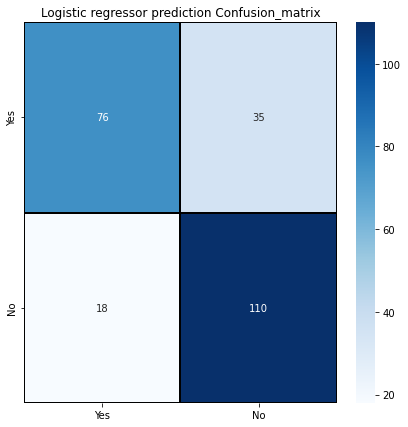

In [113]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Logistic regressor prediction Confusion_matrix")

## Classification Algorithms

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest Classifier

In [115]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.7949790794979079
confusion_matrix: 
 [[ 85  26]
 [ 23 105]]
classification_report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       111
           1       0.80      0.82      0.81       128

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



## Confusion Matrix for RFC

Text(0.5, 1.0, 'RFC prediction Confusion_matrix')

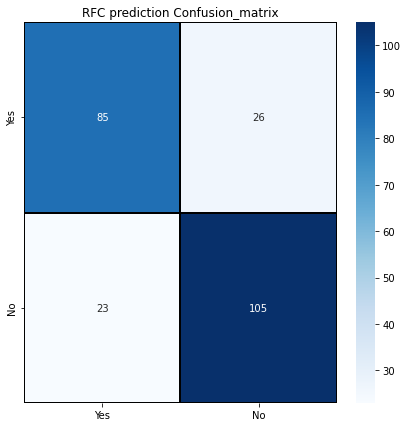

In [116]:
cm = confusion_matrix(y_test,pred_rfc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("RFC prediction Confusion_matrix")

## Decision Tree Classifier

In [117]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.7071129707112971
confusion_matrix: 
 [[79 32]
 [38 90]]
classification_report: 
               precision    recall  f1-score   support

           0       0.68      0.71      0.69       111
           1       0.74      0.70      0.72       128

    accuracy                           0.71       239
   macro avg       0.71      0.71      0.71       239
weighted avg       0.71      0.71      0.71       239



## Confusion Matrix for DTC

Text(0.5, 1.0, 'DTC prediction Confusion_matrix')

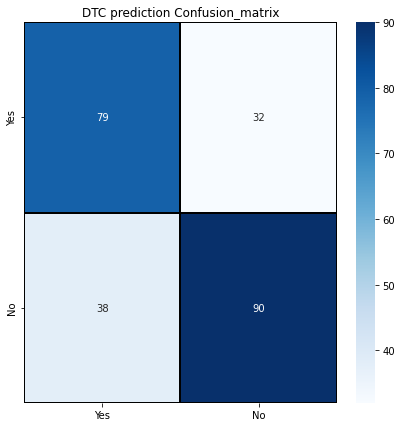

In [118]:
cm = confusion_matrix(y_test,pred_dtc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("DTC prediction Confusion_matrix")

## Support Vector Machine Classifier

In [119]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.7489539748953975
confusion_matrix: 
 [[ 58  53]
 [  7 121]]
classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.52      0.66       111
           1       0.70      0.95      0.80       128

    accuracy                           0.75       239
   macro avg       0.79      0.73      0.73       239
weighted avg       0.79      0.75      0.74       239



## Confusion Matrix for SVC

Text(0.5, 1.0, 'SVC prediction Confusion_matrix')

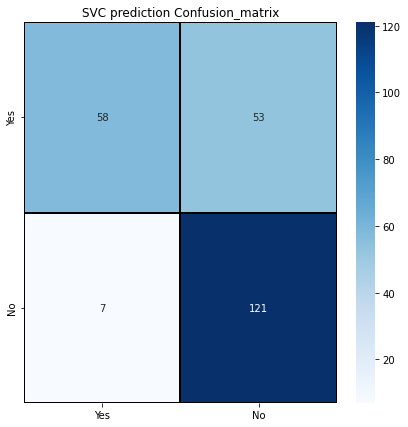

In [120]:
cm = confusion_matrix(y_test,pred_svc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("SVC prediction Confusion_matrix")

# KNN Classifier

In [121]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.7112970711297071
confusion_matrix: 
 [[83 28]
 [41 87]]
classification_report: 
               precision    recall  f1-score   support

           0       0.67      0.75      0.71       111
           1       0.76      0.68      0.72       128

    accuracy                           0.71       239
   macro avg       0.71      0.71      0.71       239
weighted avg       0.72      0.71      0.71       239



## Confusion Matrix for KNN classifier

Text(0.5, 1.0, 'KNN prediction Confusion_matrix')

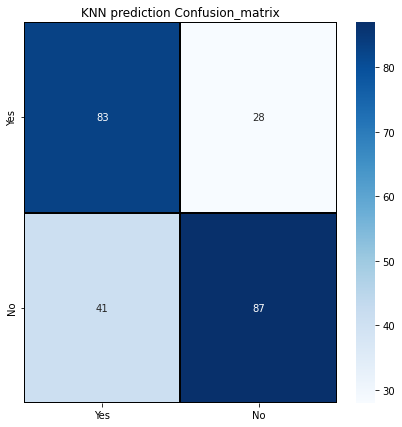

In [122]:
cm = confusion_matrix(y_test,pred_knn)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("KNN prediction Confusion_matrix")

## Gradient Boosting Classifier

In [123]:
gb = GradientBoostingClassifier(n_estimators =300,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_gb))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_gb))
print("classification_report: \n",classification_report(y_test,pred_gb))

accuracy_score:  0.7740585774058577
confusion_matrix: 
 [[86 25]
 [29 99]]
classification_report: 
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       111
           1       0.80      0.77      0.79       128

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



## Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Gradient Boosting classifier prediction Confusion_matrix')

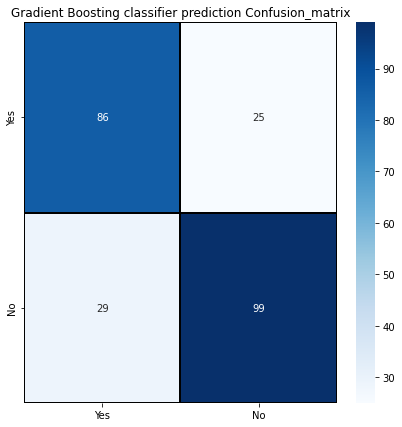

In [124]:
cm = confusion_matrix(y_test,pred_gb)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Gradient Boosting classifier prediction Confusion_matrix")

## Cross Validation Score for all the model

### CV Score for Logistic Regression

In [125]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.7211084905660377


### CV Score for Random Forest Classifier

In [126]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.7914544025157234


### CV Score for Decision Tree Classifier

In [127]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.7626100628930818


### CV Score for Support Vector Classifier

In [128]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for Support Vector  Classifier:  0.7161163522012578


### CV Score for KNN Classifier

In [129]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.724882075471698


### CV Score for Gradient Boosting Classifier

In [130]:
print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=5).mean())

CV score for Gradient Boosting Classifier:  0.7789072327044025


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

## Hyper parameter tuning for best model using GridsearchCV

In [131]:
parameters={
    'max_depth': [2,3,4],
    'max_features': ['auto', 'sqrt'],
    'max_samples':[0,0.1,0.001,1],
    'criterion':['gini','entropy'],
    'n_estimators': [100,200,300,500]}
CV_RFC = GridSearchCV(rfc, param_grid= parameters, scoring= 'accuracy', cv= 5)

In [132]:
CV_RFC.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'max_samples': [0, 0.1, 0.001, 1],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [133]:
CV_RFC.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_samples': 0.1,
 'n_estimators': 300}

In [134]:
loan_status=RandomForestClassifier(n_estimators=300, criterion='gini',max_depth=2, max_features='auto',max_samples=0.1)
loan_status.fit(x_train,y_train)
predict=loan_status.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,predict))
print("confusion_matrix: \n",confusion_matrix(y_test,predict))
print("classification_report: \n",classification_report(y_test,predict))

accuracy score:  0.7531380753138075
confusion_matrix: 
 [[ 59  52]
 [  7 121]]
classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.53      0.67       111
           1       0.70      0.95      0.80       128

    accuracy                           0.75       239
   macro avg       0.80      0.74      0.74       239
weighted avg       0.79      0.75      0.74       239



In [135]:
acc=accuracy_score(y_test,pred)
print(acc*100)

55.64853556485355


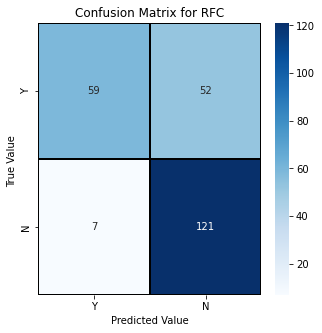

In [136]:
cm = confusion_matrix(y_test, predict)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for RFC')
plt.show()

# ROC-AUC Curve

In [137]:
fpr, tpr, threshold = roc_curve(y_test,predict)
auc = roc_auc_score(y_test,predict)

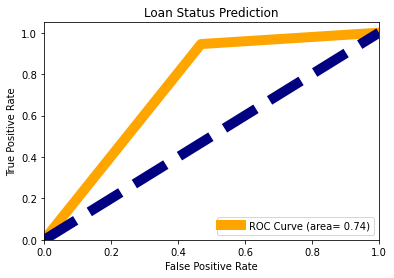

In [138]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Loan Status Prediction")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.77.

## Saving the Model

In [139]:
import pickle
filename='Loan_Status_Prediction.pickle'
pickle.dump(CV_RFC,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

## Checking predicted and original values

In [140]:
a =np.array(y_test)
predicted=np.array(CV_RFC.predict(x_test))
Loan_Status_Prediction=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Loan_Status_Prediction

,Orginal,Predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
234,0,0
235,1,0
236,0,1
237,0,0


As we can see, predicted and original values matches approx 100%.

In [141]:
model =Loan_Status_Prediction.to_csv('Loan_Status_Prediction.csv')
model

**Model Prediction saved in CSV format**